# Predicting the position of player in Football Manager 2020

## Importing the required libraries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r'C:\Users\Nilay\Desktop\Ashay\dataset.csv')

## Understanding the data

In [3]:
df.head()

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27/03/1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20/02/1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11/04/1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07/04/1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20/01/1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df.shape

(159541, 89)

In [5]:
df.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional',

In [6]:
df.describe()

,UID,NationID,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
count,1.595410e+05,1.595410e+05,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,...,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000,159541.000000
mean,1.368157e+08,7.621294e+04,23.578033,0.988987,0.108148,0.507424,0.065883,180.025097,45.874922,2.991613,...,4.156649,5.233984,3.443848,3.665854,4.031534,5.729750,3.588626,3.726798,2.332165,2.345993
std,3.492948e+08,2.051496e+06,5.640172,6.642102,1.269210,2.535295,0.591362,7.218558,36.340693,2.901983,...,6.225964,7.552120,5.806511,6.027779,6.273162,7.436234,5.536178,5.673648,4.055871,4.056001
min,5.100000e+02,5.000000e+00,14.000000,0.000000,0.000000,0.000000,0.000000,149.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.902265e+07,7.610000e+02,19.000000,0.000000,0.000000,0.000000,0.000000,175.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.104476e+07,7.760000e+02,23.000000,0.000000,0.000000,0.000000,0.000000,180.000000,68.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,6.723302e+07,7.990000e+02,27.000000,0.000000,0.000000,0.000000,0.000000,185.000000,75.000000,3.000000,...,1.000000,4.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000
max,1.394674e+09,6.200213e+07,54.000000,166.000000,65.000000,62.000000,37.000000,210.000000,118.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [7]:
df = df.dropna()

In [8]:
df['PositionsDesc']

0            DM 
1            GK 
2            DM 
3             S 
4             S 
           ...  
159536      D LC
159537    AM RLC
159538       S L
159539    M/AM R
159540       GK 
Name: PositionsDesc, Length: 159509, dtype: object

In [9]:
df['PositionsDesc'].value_counts()

S                   19281
D C                 18725
GK                  17115
M C                  9865
DM/M C               7330
                    ...  
D/WB/DM/M/AM RLC        1
GK/M C                  1
DM/M/S L                1
DM/AM L                 1
GK/M L                  1
Name: PositionsDesc, Length: 286, dtype: int64

In [10]:
df = df.set_index('UID')

## **Removing Unwanted Columns**

Since, we want to predict the position of the player from his attributes, we will have to filter the columns which we need such as Born, IntCaps and U21 details,etc.

In [11]:
df = df.drop(['NationID','Born','IntCaps','IntGoals','U21Caps','U21Goals'],axis=1)

In [12]:
position = df[['Goalkeeper', 'Sweeper', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight',
       'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft',
       'MidfielderRight', 'WingBackLeft', 'WingBackRight']]

This is what we want to predict but we can create a simpler single column to predict 

In [13]:
df['Actual_Position']=position.idxmax(axis=1)    

In [14]:
df = df.replace({'Goalkeeper':'GK', 'DefenderCentral':'CB','DefenderLeft':'LB', 'DefenderRight':'RB', 'DefensiveMidfielder':'DM','MidfielderCentral':'CM','Sweeper':'SW', 'Striker':'ST',
       'AttackingMidCentral':'AMC', 'AttackingMidLeft':'AML', 'AttackingMidRight':'AMR','MidfielderLeft':'LM','MidfielderRight':'RM', 'WingBackLeft':'LWB', 'WingBackRight':'RWB'})

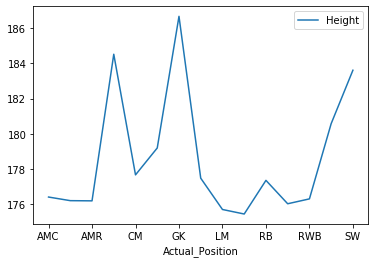

In [15]:
e = df.groupby(['Actual_Position'])[['Height']].mean()
e.plot()

In [16]:
df

,Name,Age,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,...,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight,Actual_Position
UID,,,,,,,,,,,,,,,,,,,,,
1000055,Wilfred Bamnjo,36,178,79,1,1,2,2,3,3,...,1,1,1,20,11,1,1,1,1,DM
1000331,Wang Wei,34,188,90,12,3,5,1,12,6,...,1,1,1,1,1,1,1,1,1,GK
1000334,Liu Yang,34,183,70,1,2,4,2,1,1,...,1,1,1,20,1,1,1,1,1,DM
1000337,Song Qi,31,170,65,1,3,1,3,2,2,...,1,1,1,1,1,1,1,1,1,ST
1000340,Chen Lei,33,181,70,3,3,2,3,1,1,...,1,1,1,1,1,1,1,1,1,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981931,Scott Palguta,33,188,87,1,1,1,1,1,1,...,17,20,10,1,1,1,1,13,1,LB
981959,Jamie Dodds,34,183,75,1,1,1,1,1,1,...,1,1,1,1,12,1,1,1,1,AMC
981962,Desmond Tachie,32,178,75,1,1,1,1,1,1,...,1,1,1,1,1,10,1,1,1,ST


Having successfully obtained a **single coloumn corresponding to a player's position**, we can now dropo the individual position attributes columns.

In [17]:
df = df.drop(['Goalkeeper', 'Sweeper', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight',
       'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft',
       'MidfielderRight', 'WingBackLeft', 'WingBackRight'],axis=1)

In [18]:
df=df.drop(['PositionsDesc'],axis=1)

In [19]:
df

,Name,Age,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,...,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,Actual_Position
UID,,,,,,,,,,,,,,,,,,,,,
1000055,Wilfred Bamnjo,36,178,79,1,1,2,2,3,3,...,4,20,6,3,9,3,10,14,11,DM
1000331,Wang Wei,34,188,90,12,3,5,1,12,6,...,6,14,10,7,11,11,12,10,6,GK
1000334,Liu Yang,34,183,70,1,2,4,2,1,1,...,5,9,11,14,7,11,13,10,8,DM
1000337,Song Qi,31,170,65,1,3,1,3,2,2,...,6,16,13,11,9,10,13,13,7,ST
1000340,Chen Lei,33,181,70,3,3,2,3,1,1,...,5,13,11,9,10,12,10,19,8,ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981931,Scott Palguta,33,188,87,1,1,1,1,1,1,...,8,11,2,15,8,11,11,10,7,LB
981959,Jamie Dodds,34,183,75,1,1,1,1,1,1,...,11,19,12,11,10,10,12,19,3,AMC
981962,Desmond Tachie,32,178,75,1,1,1,1,1,1,...,8,11,13,11,12,11,12,13,3,ST


In [20]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending = False)

Actual_Position    0.0
Crossing           0.0
Anticipation       0.0
Aggression         0.0
Technique          0.0
                  ... 
Leadership         0.0
Flair              0.0
Determination      0.0
Decisions          0.0
Name               0.0
Length: 67, dtype: float64

## Identifying Causation and Correlation in Variables

**Which variables are most likely to affect the Position of a player?**

First, we remove variables such as **Name, Controversy, etc.** which are likely to not cause any effect on position

But before that let us convert position from a categorical variable to numeric variable. We choose values such that Defenders, Midfielders and Attackers can be differentiated with ease. Here, we must apply some basic knowledge of football. You can even arbitrarily assign values, but I think it would be better to keep distance between opposite positions.

In [21]:
x=df['Actual_Position']

In [22]:
df = df.replace({'GK':100,'CB':2000,'LB':2800, 'RB':2700, 'DM':2500,'CM':3300,'SW':1900, 'ST':4600,
       'AMC': 3800, 'AML':3900, 'AMR':4000,'LM':3400,'RM':3500, 'LWB':2400, 'RWB':2700})

In [23]:
df

,Name,Age,Height,Weight,AerialAbility,CommandOfArea,Communication,Eccentricity,Handling,Kicking,...,Versatility,Adaptability,Ambition,Loyalty,Pressure,Professional,Sportsmanship,Temperament,Controversy,Actual_Position
UID,,,,,,,,,,,,,,,,,,,,,
1000055,Wilfred Bamnjo,36,178,79,1,1,2,2,3,3,...,4,20,6,3,9,3,10,14,11,2500
1000331,Wang Wei,34,188,90,12,3,5,1,12,6,...,6,14,10,7,11,11,12,10,6,100
1000334,Liu Yang,34,183,70,1,2,4,2,1,1,...,5,9,11,14,7,11,13,10,8,2500
1000337,Song Qi,31,170,65,1,3,1,3,2,2,...,6,16,13,11,9,10,13,13,7,4600
1000340,Chen Lei,33,181,70,3,3,2,3,1,1,...,5,13,11,9,10,12,10,19,8,4600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981931,Scott Palguta,33,188,87,1,1,1,1,1,1,...,8,11,2,15,8,11,11,10,7,2800
981959,Jamie Dodds,34,183,75,1,1,1,1,1,1,...,11,19,12,11,10,10,12,19,3,3800
981962,Desmond Tachie,32,178,75,1,1,1,1,1,1,...,8,11,13,11,12,11,12,13,3,4600


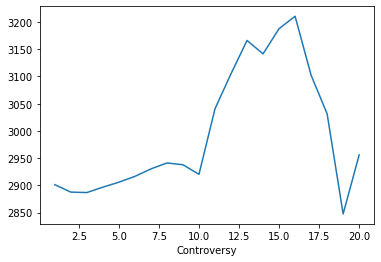

In [24]:
l = df.groupby(['Controversy'])['Actual_Position'].mean()
l.plot()

We will use heatmaps and correlation coefficient.

The standard cutoff is that the magnitude of Correlation coefficient must be 
* between 0.3-0.7 - Moderately significant variable
* above 0.7 - Highly significant
* below 0.3 - not significant / can be discarded

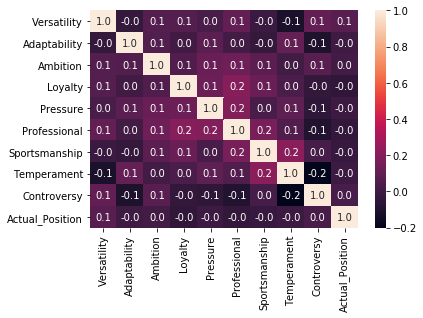

In [25]:
r = df[[ 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy','Actual_Position']]
sns.heatmap(r.corr(),annot=True,fmt=".1f")

So, the above attributes have no correlation with the position

Therefore, we drop the columns.

In [26]:
df = df.drop([ 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy'],axis=1)

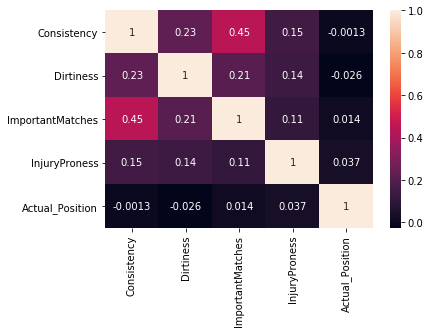

In [27]:
r = df[['Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness','Actual_Position']]
sns.heatmap(r.corr(),annot=True)

In [28]:
df = df.drop(['Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness'],axis=1)

In [29]:
df.columns

Index(['Name', 'Age', 'Height', 'Weight', 'AerialAbility', 'CommandOfArea',
       'Communication', 'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes',
       'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks',
       'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Actual_Position'],
      dtype='object')

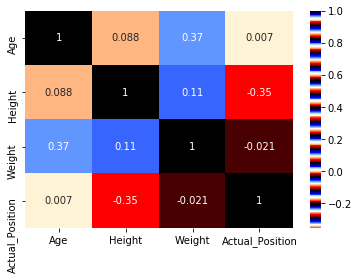

In [30]:
d1 = df[['Name', 'Age', 'Height', 'Weight','Actual_Position']]
sns.heatmap(d1.corr(),annot=True,cmap='flag')

Therefore,height has a good correlation with the position.

In [31]:
df=df.drop(['Name', 'Age', 'Weight'],axis=1)

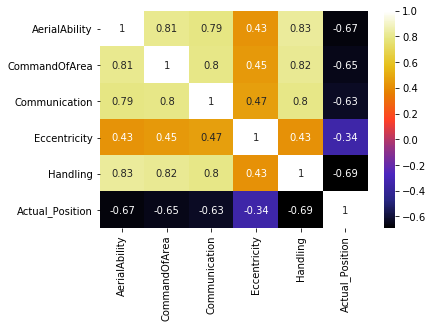

In [32]:
d2 = df[['AerialAbility', 'CommandOfArea',
       'Communication', 'Eccentricity', 'Handling','Actual_Position']]
sns.heatmap(d2.corr(),annot=True,cmap='CMRmap')

So,all these attributes have a very good correlation with actual_position and with each other. (except maybe eccentricity)

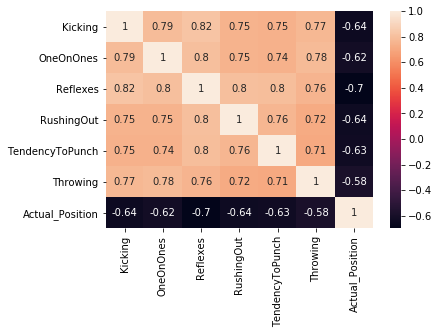

In [33]:
d3 = df[['Kicking', 'OneOnOnes',
       'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing','Actual_Position']]
sns.heatmap(d3.corr(),annot=True)

The above two correlation plots suggest that the variables arew closely related with each other(All have similar and strongcorrelation with each other). So let us see if we can combine the variables into a single one and study its correlation with the Position variable.

This is expected as if you have some basic football knowledge, you would easily guess that the above two variable sets are Goalkeepeing attributes

C:\Users\Nilay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


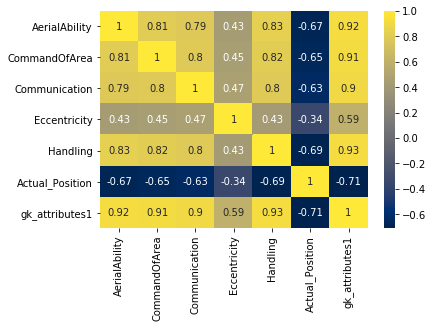

In [34]:
d2['gk_attributes1']= d2.iloc[:,0:5].mean(axis=1)
sns.heatmap(d2.corr(),annot=True,cmap='cividis')

In [35]:
d2 = d2.drop(['AerialAbility', 'CommandOfArea',
       'Communication', 'Eccentricity', 'Handling'],axis=1)

So, we can replace this in actual dataframe 

In [36]:
df['gk_attributes1'] = d2['gk_attributes1']

Similarly for the other Goalkeeping attributes

C:\Users\Nilay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


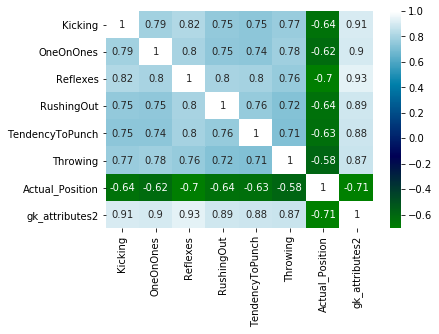

In [37]:
d3['gk_attributes2']= d3.iloc[:,0:6].mean(axis=1)
sns.heatmap(d3.corr(),annot=True,cmap='ocean')

In [38]:
df['gk_attributes2'] = d3['gk_attributes2']

In [39]:
df = df.drop(['AerialAbility', 'CommandOfArea',
       'Communication', 'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes',
       'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing'],axis=1)

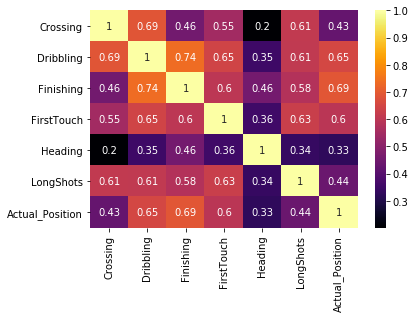

In [40]:
d4 = df[['Crossing', 'Dribbling', 'Finishing', 'FirstTouch','Heading', 'LongShots','Actual_Position']]
sns.heatmap(d4.corr(),annot=True,cmap='inferno')

So, heading and crossing are not a conclusive ability in determining position.Lets drop heading and see how the average of other abilities fares

C:\Users\Nilay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


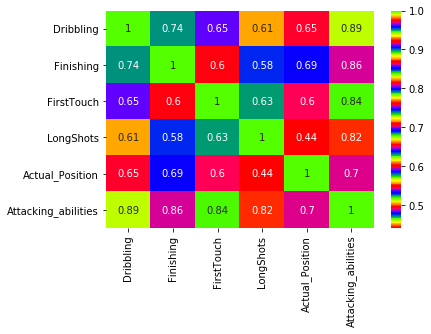

In [41]:
d4 =  df[['Dribbling', 'Finishing', 'FirstTouch', 'LongShots','Actual_Position']]
d4['Attacking_abilities'] = d4.iloc[:,0:4].mean(axis=1)
sns.heatmap(d4.corr(),annot=True,cmap='prism')

In [42]:
df['Attacking_abilities'] = d4['Attacking_abilities']
df = df.drop(['Crossing', 'Dribbling', 'Finishing', 'FirstTouch','Heading', 'LongShots'],axis=1)
df

,Height,Corners,Freekicks,Longthrows,Marking,Passing,PenaltyTaking,Tackling,Technique,Aggression,...,LeftFoot,NaturalFitness,Pace,RightFoot,Stamina,Strength,Actual_Position,gk_attributes1,gk_attributes2,Attacking_abilities
UID,,,,,,,,,,,,,,,,,,,,,
1000055,178,3,4,1,6,6,2,12,9,15,...,12,12,6,20,5,12,2500,1.8,2.000000,9.00
1000331,188,3,6,1,3,1,3,2,1,6,...,11,5,8,20,1,7,100,6.6,4.333333,1.75
1000334,183,3,3,1,5,8,2,10,6,5,...,5,8,6,20,4,9,2500,2.0,2.000000,6.00
1000337,170,3,3,1,2,3,2,1,9,6,...,2,8,7,20,6,6,4600,2.0,2.000000,5.75
1000340,181,1,1,1,1,2,4,1,3,5,...,5,5,8,20,2,5,4600,2.4,2.166667,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981931,188,3,3,10,12,10,10,12,9,13,...,20,14,11,8,13,13,2800,1.0,1.000000,6.25
981959,183,12,13,4,6,9,14,8,11,10,...,9,15,8,20,7,8,3800,1.0,1.000000,10.50
981962,178,7,6,4,3,6,6,1,12,8,...,20,10,8,11,13,7,4600,1.0,1.000000,8.50


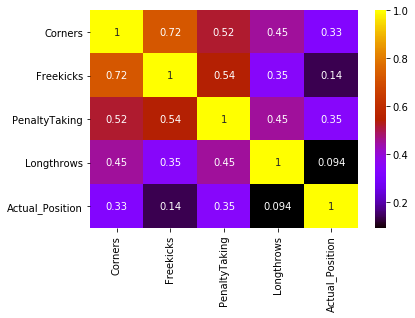

In [43]:
d5 = df[['Corners','Freekicks','PenaltyTaking','Longthrows','Actual_Position']]
sns.heatmap(d5.corr(),annot=True,cmap='gnuplot')

So, none of these abilities has a definite correlation with the position. So, we can drop these columns.

In [44]:
df=df.drop(['Corners','Freekicks','PenaltyTaking','Longthrows'],axis=1)
df.columns

Index(['Height', 'Marking', 'Passing', 'Tackling', 'Technique', 'Aggression',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decisions', 'Determination', 'Flair', 'Leadership', 'OffTheBall',
       'Positioning', 'Teamwork', 'Workrate', 'Acceleration', 'Agility',
       'Balance', 'Jumping', 'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot',
       'Stamina', 'Strength', 'Actual_Position', 'gk_attributes1',
       'gk_attributes2', 'Attacking_abilities'],
      dtype='object')

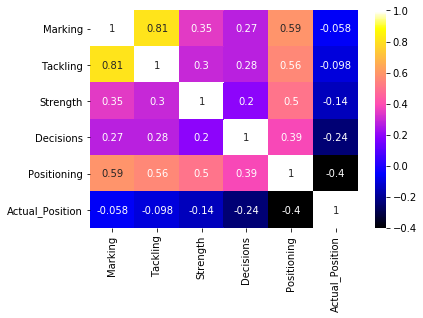

In [45]:
d6 = df[['Marking','Tackling','Strength','Decisions','Positioning','Actual_Position']]
sns.heatmap(d6.corr(),annot=True,cmap='gnuplot2')

So, we can drop all the columns except positioning

In [46]:
df = df.drop(['Marking','Tackling','Strength','Decisions'],axis=1)

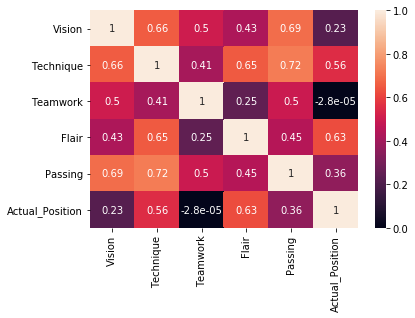

In [47]:
d7 = df[['Vision','Technique','Teamwork','Flair','Passing','Actual_Position']]
sns.heatmap(d7.corr(),annot=True)

So, only technique,passing and flair are deterministic to position

In [48]:
df = df.drop(['Vision','Teamwork'],axis=1)


In [49]:
df.columns

Index(['Height', 'Passing', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Determination', 'Flair',
       'Leadership', 'OffTheBall', 'Positioning', 'Workrate', 'Acceleration',
       'Agility', 'Balance', 'Jumping', 'LeftFoot', 'NaturalFitness', 'Pace',
       'RightFoot', 'Stamina', 'Actual_Position', 'gk_attributes1',
       'gk_attributes2', 'Attacking_abilities'],
      dtype='object')

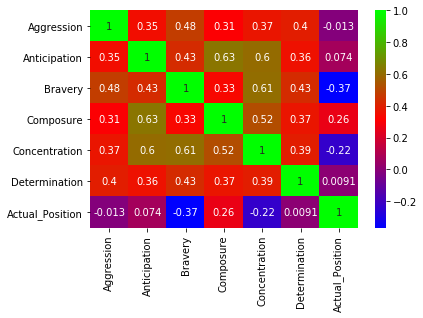

In [50]:
d8 = df[['Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Determination','Actual_Position']]
sns.heatmap(d8.corr(),annot=True,cmap='brg')

In [51]:
df = df.drop(['Aggression', 'Anticipation','Composure', 'Concentration', 'Determination'],axis=1)

In [52]:
df.columns

Index(['Height', 'Passing', 'Technique', 'Bravery', 'Flair', 'Leadership',
       'OffTheBall', 'Positioning', 'Workrate', 'Acceleration', 'Agility',
       'Balance', 'Jumping', 'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot',
       'Stamina', 'Actual_Position', 'gk_attributes1', 'gk_attributes2',
       'Attacking_abilities'],
      dtype='object')

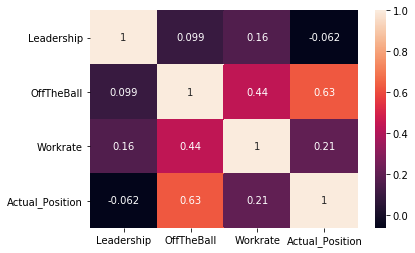

In [53]:
d9 = df[['Leadership','OffTheBall','Workrate','Actual_Position']]
sns.heatmap(d9.corr(),annot=True)

In [54]:
df = df.drop(['Leadership','Workrate',],axis=1)

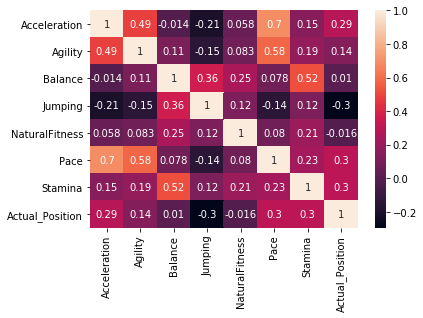

In [55]:
d10 = df[['Acceleration', 'Agility',
       'Balance', 'Jumping', 'NaturalFitness', 'Pace',
       'Stamina','Actual_Position']]
sns.heatmap(d10.corr(),annot=True)

None of the attributes is prominent, so all can be dropped

In [56]:
df = df.drop(['Acceleration', 'Agility',
       'Balance', 'Jumping', 'NaturalFitness', 'Pace',
       'Stamina'],axis=1)

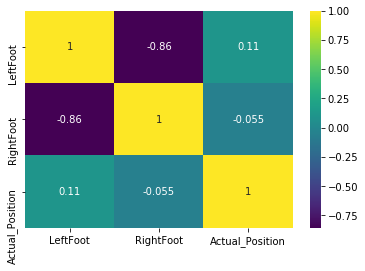

In [57]:
d11 = df[['LeftFoot','RightFoot','Actual_Position']]
sns.heatmap(d11.corr(),annot=True,cmap='viridis')

In [60]:
df = df.drop(['LeftFoot','RightFoot'],axis=1)

In [61]:
df

,Height,Passing,Technique,Bravery,Flair,OffTheBall,Positioning,Actual_Position,gk_attributes1,gk_attributes2,Attacking_abilities
UID,,,,,,,,,,,
1000055,178,6,9,13,7,4,9,2500,1.8,2.000000,9.00
1000331,188,1,1,12,2,1,8,100,6.6,4.333333,1.75
1000334,183,8,6,4,5,3,6,2500,2.0,2.000000,6.00
1000337,170,3,9,1,9,11,2,4600,2.0,2.000000,5.75
1000340,181,2,3,4,5,9,1,4600,2.4,2.166667,5.25
...,...,...,...,...,...,...,...,...,...,...,...
981931,188,10,9,13,5,9,11,2800,1.0,1.000000,6.25
981959,183,9,11,10,12,9,11,3800,1.0,1.000000,10.50
981962,178,6,12,5,11,14,7,4600,1.0,1.000000,8.50


## Model - Predict, Fit, Deploy, Score

In [62]:
X = df.drop(['Actual_Position'],axis=1)
y = df['Actual_Position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.9066081145576872
157675.16676162294


In [64]:
 from sklearn.linear_model import LinearRegression
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
y_test_preds2 = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds2), len(y_test))

'The r-squared score for your model was 0.8418378778537383 on 39878 values.'

In [65]:
y_test_pred = (y_test_preds/ 100).astype(int) *100
y_test_pred2 = (y_test_preds2/ 100).astype(int) *100
y_test_pred

array([4000, 4100, 3900, ..., 2900,  100, 3300])

In [66]:
print(r2_score(y_test, y_test_pred))

0.9048885939593159


In [67]:
print(r2_score(y_test, y_test_pred2))

0.8424486095715691


## Conclusion

We tested 2 models 
1. Linear Regression Technique - R square score = 84.2%
2. Random Forest Regression Technique - R square score = 90.48%

The above R2 scores that our model has been successful in predicting the positions of the players based on the input variable attributes.

In this project, we have answered the question that yes, using certain attributes we can be successful in predicting the position of players in FM2020 upto a certain degree of accuracy. We also identified the key attributesin determining the position were:
* Goalkeeping Attributes = AerialAbility, CommandOfArea,Communication,Handling,Kicking,OneOnOnes,Reflexes,RushingOut,  TendencyToPunch,Throwing
* Height
* Passing
* Technique
* Bravery
* Flair
* Positioning
* Attacking attributes = Dribbling, Finishing, FirstTouch, LongShots

### Limitations

However, the above implementation of the model in this code was a Regression and not a Classification. 

You might be wondering, "Why so?" and rightly because the aim of this project was to classify a player and assign him one of the available positions.

But, in the practical world of football, it is not that a player can play in a single position. He can play in multiple positions and it would become hard for a Classifier to classify the players into a single position. 

Instead, what we did was assign a value to each position based on the inter-dependence and the relationship between each position. For instance, the central defenders will have similar defensive abilities(and so closer positional index) to defensive midfielders but their attacking prowess will be low. ALso, Attaacking Midfield should have similar positional index to Striker(upper bound) and centra mifield(lower bound).
To quantify these indices, we need basic football knowledge and help from online resources of FM like http://footballmanagerblog.org//.

So, the predicting model might predict a position close to each other. Like Central Attacking midfielder might be predicted as Left Attacking Midfielder. For this reason, we preferred a regression model over classification.